
# Spectral width

Spatial coherence on the Piton de la Fournaise volcano.

We here reproduce a part of the result published in
:cite:t:`seydoux_detecting_2016`, and revisited over this particular time
period in :cite:t:`journeau_seismic_2022`. In this example, the processing
is made in two domains: first in the time domain with a smoothing of the
envelope of the signal, and then in the frequency domain with the estimation
of the covariance matrix.


In [1]:
import os

import covseisnet as csn

## Read and pre-process stream

The stream is read and pre-processed by detrending, tapering, and highpass
filtering. Several other pre-processing methods are available in the
:class:`~covseisnet.stream.NetworkStream` classs. The stream is then whitened
using the method :func:`~covseisnet.stream.NetworkStream.whiten`. The method
requires a window duration in seconds and a smooth length to smooth the
spectral whitening.



In [2]:
# Path to the example stream
filepath_waveforms = "data/undervolc_example.mseed"

# Download stream if not available
if not os.path.exists(filepath_waveforms):
    csn.data.download_undervolc_data()

# Read example stream
stream = csn.read(filepath_waveforms)
stream.filter("highpass", freq=0.5)
stream.time_normalize(method="smooth", smooth_length=1001)
stream.taper(max_percentage=0.01)

15 Trace(s) in NetworkStream (synced):
YA.UV01.00.HHZ | 2010-10-14T09:00:00.000000Z - 2010-10-14T15:59:59.950000Z | 20.0 Hz, 504000 samples
YA.UV02.00.HHZ | 2010-10-14T09:00:00.000000Z - 2010-10-14T15:59:59.950000Z | 20.0 Hz, 504000 samples
YA.UV03.00.HHZ | 2010-10-14T09:00:00.000000Z - 2010-10-14T15:59:59.950000Z | 20.0 Hz, 504000 samples
YA.UV04.00.HHZ | 2010-10-14T09:00:00.000000Z - 2010-10-14T15:59:59.950000Z | 20.0 Hz, 504000 samples
YA.UV05.00.HHZ | 2010-10-14T09:00:00.000000Z - 2010-10-14T15:59:59.950000Z | 20.0 Hz, 504000 samples
YA.UV06.00.HHZ | 2010-10-14T09:00:00.000000Z - 2010-10-14T15:59:59.950000Z | 20.0 Hz, 504000 samples
YA.UV07.00.HHZ | 2010-10-14T09:00:00.000000Z - 2010-10-14T15:59:59.950000Z | 20.0 Hz, 504000 samples
YA.UV08.00.HHZ | 2010-10-14T09:00:00.000000Z - 2010-10-14T15:59:59.950000Z | 20.0 Hz, 504000 samples
YA.UV09.00.HHZ | 2010-10-14T09:00:00.000000Z - 2010-10-14T15:59:59.950000Z | 20.0 Hz, 504000 samples
YA.UV10.00.HHZ | 2010-10-14T09:00:00.000000Z - 2010-

## Covariance matrix

The covariance matrix is calculated using the method
:func:`~covseisnet.covariance.calculate_covariance_matrix`. The method
returns the times, frequencies, and covariances of the covariance matrix.
Among the parameters of the method, the window duration and the number of
windows are important to consider. The window duration is the length of the
Fourier estimation window in seconds, and the number of windows is the
number of windows to average to estimate the covariance matrix.

We can then visualize the covariance matrix at a given time and frequency,
and its corresponding eigenvalues.



(<Figure size 800x270 with 3 Axes>,
 array([<Axes: title={'center': 'Covariance matrix'}, xlabel='Channel $i$', ylabel='Channel $j$'>,
        <Axes: title={'center': 'Eigenspectrum'}, xlabel='Eigenvalue index ($n$)', ylabel='Eigenvalue ($\\lambda_n$)'>],
       dtype=object))

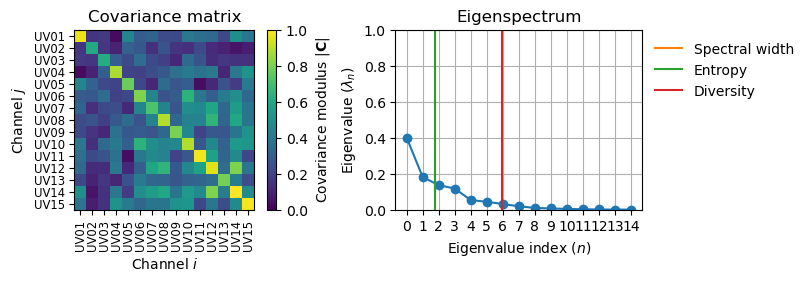

In [3]:
# Calculate covariance matrix
times, frequencies, covariances = csn.calculate_covariance_matrix(
    stream, window_duration=20, average=20, whiten="slice"
)

# Show covariance from sample window and frequency
t_index = 60
f_index = 100
csn.plot.covariance_matrix_modulus_and_spectrum(covariances[t_index, f_index])

## Spectral width

We here extract the coherence from the covariance matrix. The coherence is
calculated using the method
:func:`~covseisnet.covariance.CovarianceMatrix.coherence`. It can either
measure the spectral width of the eigenvalue distribution at each frequency,
or with applying the formula of the Neumann entropy.



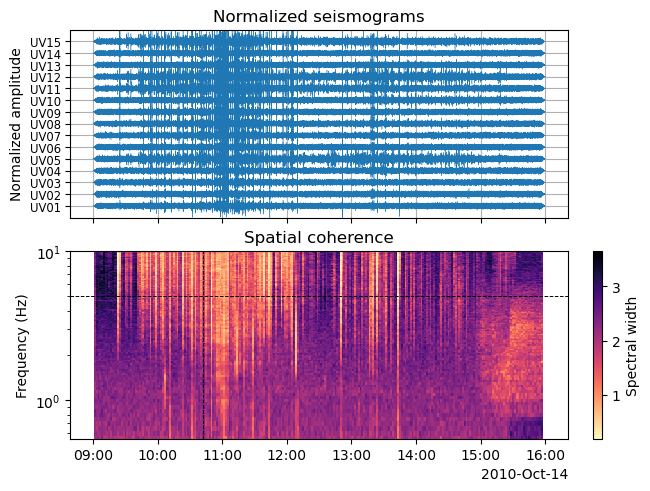

In [5]:
# Calculate coherence
coherence = covariances.coherence(kind="spectral_width")

# Show
_, ax = csn.plot.stream_and_coherence(
    stream,
    times,
    frequencies,
    coherence,
    f_min=0.5,
)

# Mark extracted time and frequency
ax[1].axvline(times[t_index], color="k", linestyle="--", lw=0.7)
ax[1].axhline(frequencies[f_index], color="k", linestyle="--", lw=0.7)